In [1]:
# Import libraries
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import geopandas as gpd
import rasterio



import earthpy as et
import earthpy.plot as ep

In [2]:
# load the raster data files
forest_loss = rxr.open_rasterio('F:/Forest_Loss/Forestloss.tif', masked=True).squeeze()
forest = rxr.open_rasterio('F:/Forest_Loss/Forest2.tif', masked=True).squeeze()


In [3]:
in_img = r"F:/Forest_Loss/Forestloss.tif"
data = rasterio.open(in_img)

data

ds = data.read()
ds

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [4]:
# Load vector files
east_afr = gpd.read_file('F:/OSSDATA/Shapefiles/Dissolved/EasternAfrica.shp')
south_afr = gpd.read_file('F:/OSSDATA/Shapefiles/Dissolved/SouthAfrica.shp')
north_afr = gpd.read_file('F:/OSSDATA/Shapefiles/Dissolved/NorthAfrica.shp')
west_afr = gpd.read_file('F:/OSSDATA/Shapefiles/Dissolved/WesternAfrica.shp')
central_afr = gpd.read_file('F:/OSSDATA/Shapefiles/Dissolved/CentralAfrica.shp')

In [5]:
# Clip the raster files
EA = forest_loss.rio.clip(east_afr.geometry.apply(mapping))
ea = forest.rio.clip(east_afr.geometry.apply(mapping))

SA = forest_loss.rio.clip(south_afr.geometry.apply(mapping))
sa = forest.rio.clip(south_afr.geometry.apply(mapping))

NA = forest_loss.rio.clip(north_afr.geometry.apply(mapping))
na = forest.rio.clip(north_afr.geometry.apply(mapping))

WA = forest_loss.rio.clip(west_afr.geometry.apply(mapping))
wa = forest.rio.clip(west_afr.geometry.apply(mapping))

CA = forest_loss.rio.clip(central_afr.geometry.apply(mapping))
ca = forest.rio.clip(central_afr.geometry.apply(mapping))

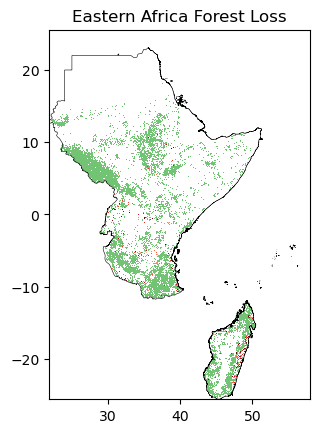

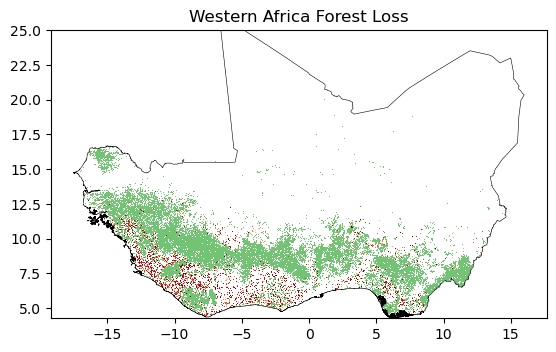

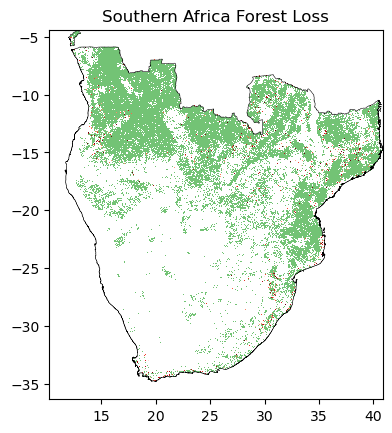

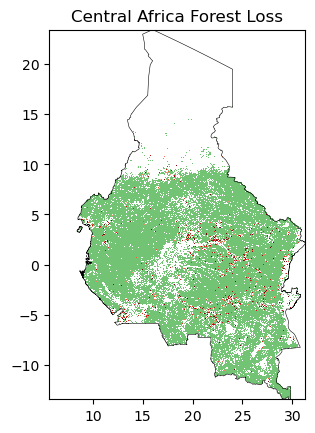

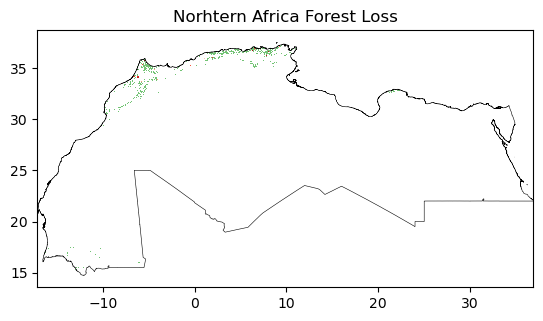

In [6]:
def Maps(rst_fl, rst_f, vct, ttl, name):
    fig, ax = plt.subplots()

    rst_fl.plot.imshow(ax=ax, cmap="Reds", add_colorbar=False)
    rst_f.plot.imshow(ax=ax, cmap="Greens", add_colorbar=False)

    vct.geometry.boundary.plot(color=None,edgecolor='k',linewidth = .4,ax=ax)

    # ax.set_axis_off()
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set(title=ttl)
    plt.show()
    
    # Export the images
    outpath = r'D:/OSS_2/Scripts/Maps'
    path = os.path.join(os.path.join(outpath, name + '.svg'))
    fig.savefig(path, format = 'svg', dpi=1200)
    
# Call the function
Maps(EA, ea, east_afr, "Eastern Africa Forest Loss", "Eastern_")
Maps(WA, wa, west_afr, "Western Africa Forest Loss", "Western_")
Maps(SA, sa, south_afr, "Southern Africa Forest Loss", "Southern_")
Maps(CA, ca, central_afr, "Central Africa Forest Loss", "Central_")
Maps(NA, na, north_afr, "Norhtern Africa Forest Loss", "Northern_")